# Creating and Backtesting SMA Strategies

## Getting the Data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [36]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [37]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


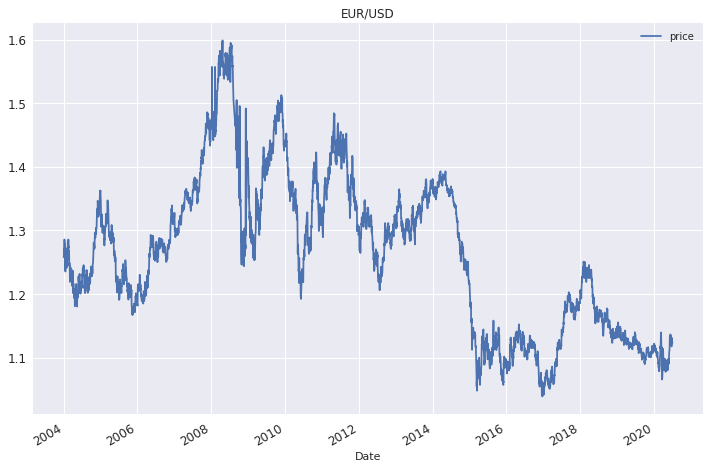

In [39]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [40]:
df["returns"] = np.log(df.price / (df.price.shift(1)))

In [41]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## A simple Buy and Hold "Strategy"

In [42]:
df.dropna(inplace = True)

In [43]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


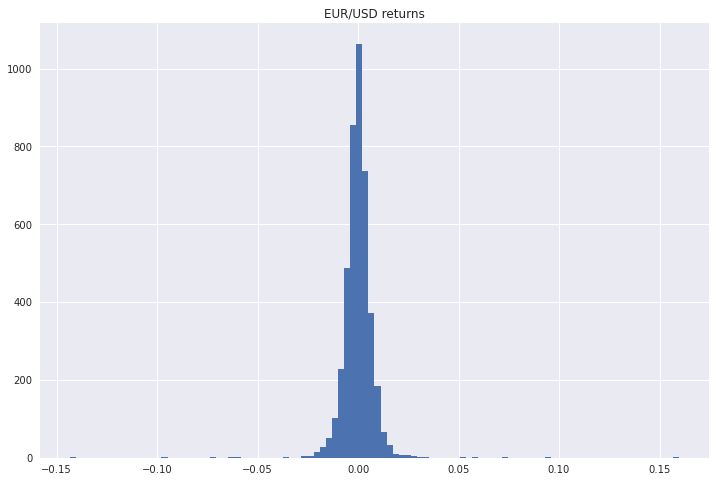

In [44]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [45]:
df.returns.sum()

-0.11214302770699758

In [48]:
np.exp(df.returns.sum())

0.8939163935445148

In [49]:
df.price[-1] / df.price[0]

0.8939163935445141

In [51]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [63]:
df["creturns"] = df.returns.cumsum().apply(np.exp)*925

In [64]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,925.000000
2004-01-05,1.268698,0.008313,932.721994
2004-01-06,1.272103,0.002681,935.225529
2004-01-07,1.264095,-0.006315,929.338111
2004-01-08,1.277498,0.010547,939.192044
...,...,...,...
2020-06-24,1.131235,0.002892,831.661860
2020-06-25,1.125087,-0.005449,827.142509
2020-06-26,1.122208,-0.002562,825.026081


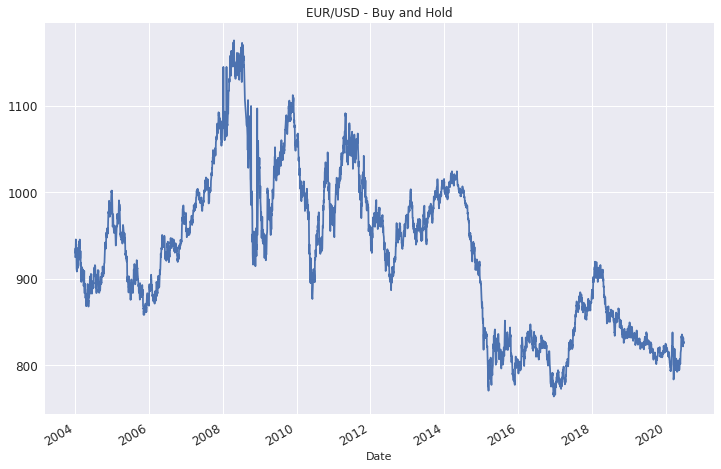

In [65]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

In [55]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


## More Performance Metrics

In [ ]:
df

In [ ]:
df.creturns.iloc[-1] # absolute Performance 

In [ ]:
df.returns.sum() # absolute Performance

In [ ]:
df.describe()

__annualized mean return and risk__

In [ ]:
df.returns.mean() * 252 # mean return

In [ ]:
df.returns.std() * np.sqrt(252) # risk

__maximum drawdown__

In [ ]:
df

In [ ]:
df["cummax"] = df.creturns.cummax()

In [ ]:
df

In [ ]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [ ]:
drawdown = df["cummax"] - df["creturns"]
drawdown

In [ ]:
drawdown.max() # maximum drawdown

In [ ]:
drawdown.idxmax()

## Defining an SMA Crossover Strategy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
data

In [ ]:
sma_s = 50
sma_l = 200

In [ ]:
data.price.rolling(50).mean()

In [ ]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [ ]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [ ]:
data

In [ ]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [ ]:
data

In [ ]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [ ]:
data.loc["2016", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
data[["returns", "strategy"]].sum() # absolute performance

In [ ]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

In [ ]:
data[["returns", "strategy"]].mean() * 252 # annualized return

In [ ]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

## Finding the optimal SMA Strategy

In [ ]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [ ]:
df

In [ ]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [ ]:
test_strategy((50, 200))

In [ ]:
test_strategy((75, 150))

In [ ]:
test_strategy((25, 252))

In [ ]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [ ]:
SMA_S_range

In [ ]:
from itertools import product

In [ ]:
list(product(SMA_S_range, SMA_L_range))

In [ ]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [ ]:
len(combinations)

In [ ]:
(50-10) * (252-100)

In [ ]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [ ]:
results

In [ ]:
np.max(results)

In [ ]:
np.argmax(results)

In [ ]:
combinations[np.argmax(results)]

In [ ]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

In [ ]:
many_results["performance"] = results

In [ ]:
many_results

In [ ]:
many_results.nlargest(10, "performance")

In [ ]:
many_results.nsmallest(10, "performance")